<a href="https://colab.research.google.com/github/aaroncantu22/CSCI164AIProjects/blob/main/CSCI164_Poker_Hand_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas scikit-learn matplotlib seaborn imbalanced-learn

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [ ]:
# Load training data
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/poker/poker-hand-training-true.data"
df = pd.read_csv(url, header=None)
df.columns = ['S1', 'R1', 'S2', 'R2', 'S3', 'R3', 'S4', 'R4', 'S5', 'R5', 'Hand']

# Load test data (optional, for final validation)
test_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/poker/poker-hand-testing.data"
df_test = pd.read_csv(test_url, header=None)
df_test.columns = ['S1', 'R1', 'S2', 'R2', 'S3', 'R3', 'S4', 'R4', 'S5', 'R5', 'Hand']

# Preview data
df.head()

,S1,R1,S2,R2,S3,R3,S4,R4,S5,R5,Hand
0,1,10,1,11,1,13,1,12,1,1,9
1,2,11,2,13,2,10,2,12,2,1,9
2,3,12,3,11,3,13,3,10,3,1,9
3,4,10,4,11,4,1,4,13,4,12,9
4,4,1,4,13,4,12,4,11,4,10,9


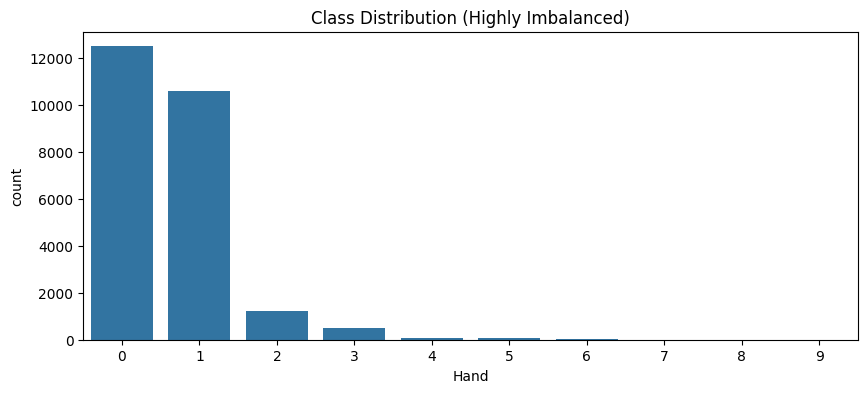

In [ ]:
plt.figure(figsize=(10, 4))
sns.countplot(x='Hand', data=df)
plt.title("Class Distribution (Highly Imbalanced)")
plt.show()

In [ ]:
# Separate features (X) and target (y)
X = df.drop('Hand', axis=1)
y = df['Hand']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       0.64      0.80      0.71      2552
           1       0.57      0.50      0.53      2075
           2       0.33      0.00      0.01       230
           3       0.00      0.00      0.00       101
           4       0.00      0.00      0.00        22
           5       0.00      0.00      0.00         9
           6       0.00      0.00      0.00        12
           7       0.00      0.00      0.00         1

    accuracy                           0.61      5002
   macro avg       0.19      0.16      0.16      5002
weighted avg       0.58      0.61      0.58      5002



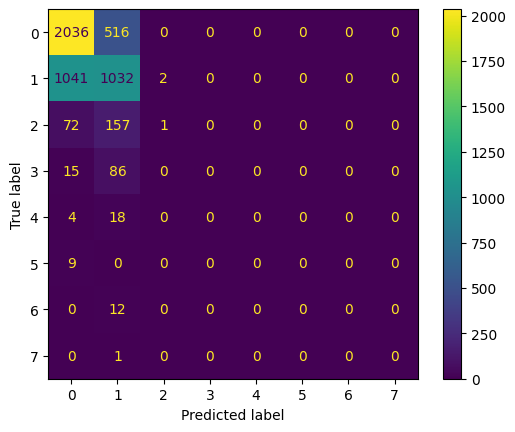

In [ ]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

# Evaluate
print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

In [ ]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20]
}

grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=3, verbose=2)
grid.fit(X_train, y_train)
print("Best Parameters:", grid.best_params_)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV] END ....................max_depth=None, n_estimators=50; total time=   1.2s
[CV] END ....................max_depth=None, n_estimators=50; total time=   1.2s
[CV] END ....................max_depth=None, n_estimators=50; total time=   1.5s
[CV] END ...................max_depth=None, n_estimators=100; total time=   2.9s
[CV] END ...................max_depth=None, n_estimators=100; total time=   2.3s
[CV] END ...................max_depth=None, n_estimators=100; total time=   2.3s
[CV] END ...................max_depth=None, n_estimators=200; total time=   5.0s
[CV] END ...................max_depth=None, n_estimators=200; total time=   5.1s
[CV] END ...................max_depth=None, n_estimators=200; total time=   4.6s
[CV] END ......................max_depth=10, n_estimators=50; total time=   0.6s
[CV] END ......................max_depth=10, n_estimators=50; total time=   0.6s
[CV] END ......................max_depth=10, n_es

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cp /content/CSCI164_Poker_Hand_Project.ipynb /content/drive/MyDrive/

Mounted at /content/drive
cp: cannot stat '/content/CSCI164_Poker_Hand_Project.ipynb': No such file or directory
